In [1]:
#KERAS
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os

In [9]:
import theano
from PIL import Image
from numpy import *
# SKLEARN
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

In [77]:
# input image dimensions
img_rows, img_cols = 128,128

# number of channels
img_channels = 1

#%%
#  data

path1 = 'D:/Dataset/test/input_data'    #path of folder of images    
path2 = 'D:/Dataset/test/input_data_resized'  #path of folder to save images    

listing = os.listdir(path1) 
num_samples=size(listing)
print (num_samples)

for file in listing:
    im = Image.open(path1 + '/' + file)   
    img = im.resize((img_rows,img_cols))
    gray = img.convert('RGBA') #L為灰階
                #need to do some more processing here           
    gray.save(path2 +'/' +  file, "JPEG")

imlist = os.listdir(path2)

im1 = array(Image.open(path2 + '/'+ imlist[0])) # open one image to get size

m,n = im1.shape[0:2] # get the size of the images
imnbr = len(imlist) # get the number of images

4479


In [50]:
# create matrix to store all flattened images
immatrix = array([array(Image.open(path2+ '/' + im2)).flatten()
              for im2 in imlist],'f')
             
label=np.ones((num_samples,),dtype = int)
label[0:800]=0
label[800:1600]=1
label[1600:2400]=2
label[2400:2879]=3
label[2879:3679]=4
label[3679:4479]=5

In [51]:
data,Label = shuffle(immatrix,label, random_state=2)
train_data = [data,Label]
img=immatrix[0].reshape(img_rows,img_cols,3)
# # plt.imshow(img)
# # plt.imshow(img ,cmap='gray')
# print (train_data[0].shape)
# print (train_data[1].shape)

array([[ 198.,  200.,  225., ...,  113.,  113.,  113.],
       [ 251.,  252.,  254., ...,   47.,   53.,   53.],
       [ 255.,  253.,  255., ...,  127.,  139.,  129.],
       ..., 
       [   3.,    0.,    0., ...,    0.,    2.,   16.],
       [   0.,   22.,   36., ...,    8.,   37.,   45.],
       [  11.,    3.,    0., ...,    5.,    7.,    6.]], dtype=float32)

In [52]:
#%%

#batch_size to train
batch_size = 32
# number of output classes
nb_classes = 6
# number of epochs to train
nb_epoch = 20


# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

#%%
(x, y) = (train_data[0],train_data[1])

# STEP 1: split X and y into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols,3).astype('float32')

x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols,3).astype('float32')

# 標準化
x_train_normalize = x_train / 255
x_test_normalize = x_test / 255

print('x_train_normalize shape:', x_train_normalize.shape)
print(x_train_normalize.shape[0], 'train_normalize samples')
print(x_test_normalize.shape[0], 'test_normalize samples')

# convert class vectors to binary class matrices Onehote encoding
y_train_OneHot = np_utils.to_categorical(y_train, nb_classes)
y_test_OneHot = np_utils.to_categorical(y_test, nb_classes)

print('y_train_OneHot shape:', y_train_OneHot.shape)

x_train_normalize shape: (3583, 28, 28, 3)
3583 train_normalize samples
896 test_normalize samples
y_train_OneHot shape: (3583, 6)


In [73]:
# i = 100
# plt.imshow(x_train[i, 0], interpolation='nearest')
# print("label : ", y_train[i,:])

#%%

model = Sequential()

model.add(Conv2D(nb_filters,
                 kernel_size=(2,2),
                 padding='same',
                 input_shape=( img_rows, img_cols,3),
                 activation='relu'))



model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.25))
model.add(Conv2D(nb_filters*2,
                 kernel_size=(2,2),
                 padding='same',
                 activation='relu'))



model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(nb_classes,activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        416       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 3136)              0         
__________

In [74]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'] ) #optimizer='adadelta'

# #%%

In [75]:
scores = model.evaluate(x_test_normalize,y_test_OneHot)
scores[1]

800/896 [=========================>....] - ETA: 0s

0.22209821428571427

In [76]:
train_history = model.fit(x_train_normalize, y_train_OneHot,
                          validation_split =0.2,
                          epochs=20,
                          batch_size=100,verbose=1) #show_accuracy=True,validation_data=(x_test, y_test)
            
            
# hist = model.fit(x_train, y_train, batch_size=batch_size, nb_epoch=nb_epoch,
#               show_accuracy=True, verbose=1, validation_split=0.2)


# # visualizing losses and accuracy

# train_loss=hist.history['loss']
# val_loss=hist.history['val_loss']
# train_acc=hist.history['acc']
# val_acc=hist.history['val_acc']
# xc=range(nb_epoch)

Train on 2866 samples, validate on 717 samples
Epoch 1/20
2866/2866 [==============================] - 3s - loss: 1.4626 - acc: 0.4023 - val_loss: 1.2513 - val_acc: 0.4923
Epoch 2/20
2866/2866 [==============================] - 3s - loss: 1.1158 - acc: 0.5454 - val_loss: 1.0929 - val_acc: 0.5635
Epoch 3/20
2866/2866 [==============================] - 3s - loss: 0.9631 - acc: 0.6151 - val_loss: 1.0284 - val_acc: 0.6137
Epoch 4/20
2866/2866 [==============================] - 3s - loss: 0.9059 - acc: 0.6308 - val_loss: 1.0636 - val_acc: 0.5593
Epoch 5/20
2866/2866 [==============================] - 3s - loss: 0.8776 - acc: 0.6472 - val_loss: 0.9952 - val_acc: 0.6067
Epoch 6/20
2866/2866 [==============================] - 3s - loss: 0.7953 - acc: 0.6891 - val_loss: 0.9063 - val_acc: 0.6513
Epoch 7/20
2866/2866 [==============================] - 3s - loss: 0.7453 - acc: 0.7118 - val_loss: 0.9332 - val_acc: 0.6318
Epoch 8/20
2866/2866 [==============================] - 3s - loss: 0.7111 - ac

In [78]:
# 3.建立show_train_history顯示訓練過程

#設定matplotlib在jupyter note網頁內顯示圖形，如果沒設定則會另開視窗顯示
%matplotlib inline
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):   # train:訓練資料執行結果 
    plt.plot(train_history.history[train])  # train_history:之前訓練過程產生的資料
    plt.plot(train_history.history[validation])  # validation:驗證資料的執行結果
    plt.title('Train History') # 顯示圖形的標題
    plt.ylabel(train) # 顯示y軸的標題
    plt.xlabel('Epoch') # 設定x軸標籤是'Epoch'
    plt.legend(['train', 'validation'], loc='upper left') # 設定圖例是顯示'train', 'validation'，位置在左上角
    plt.show()

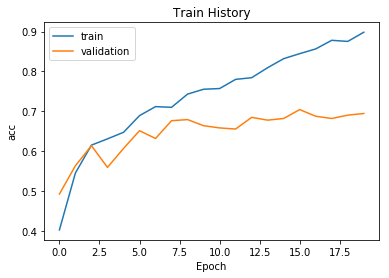

In [79]:
show_train_history(train_history,'acc','val_acc')

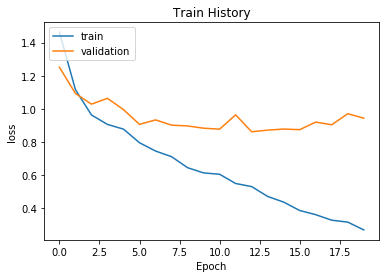

In [80]:
show_train_history(train_history,'loss','val_loss')

In [81]:
prediction = model.predict_classes(x_test_normalize)

768/896 [========================>.....] - ETA: 0s

In [82]:
import pandas as pd
pd.crosstab(y_test,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5
label,,,,,,
0,98,12,10,6,9,18
1,3,154,1,2,1,1
2,23,5,81,22,13,3
3,8,1,35,41,1,4
4,16,4,9,1,137,4
5,26,4,9,1,3,130


In [ ]:
###############################
#                             #
#          DEMO_05            #
#                             #
###############################

# 解bug
# Python：IOError: image file is truncated 的解决办法
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True # 解bug
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

#############################################################################################
train_data_dir = 'D:/Dataset/test/train'
validation_data_dir = 'D:/Dataset/test/validation'
nb_train_samples = 4480
nb_validation_samples = 1120
epochs = 50 # 迭代
batch_size = 100
##################################################################
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(56, 56),
        batch_size=100,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(56, 56),
        batch_size=100,
        class_mode='categorical')

##################################################################

print(train_generator.class_indices)  # 印出標籤
print(validation_generator.class_indices)  # 印出標籤

##################################################################

model = Sequential() # 建立model

##################################################################

# 加入卷積層1
model.add(Conv2D(filters=32, kernel_size = (2,2),   # 32個3*3濾鏡
                 input_shape = (56,56,3),   # 圖片大小&三原色
                 activation = 'relu',
                 padding = 'same' # 經過此層影像大小不變
                 ) 
         )

# 控制overfit
model.add(Dropout(rate=0.25))    

# 加入池化層1
model.add(MaxPooling2D(pool_size=(2,2))) 

##################################################################

# 加入卷積層2
model.add(Conv2D(filters=80, kernel_size = (2,2),   # 64個3*3濾鏡
                 activation = 'relu',
                 padding = 'same' # 經過此層影像大小不變
                 ) 
         )


# 控制overfit
model.add(Dropout(rate=0.25))          



# 加入池化層2
model.add(MaxPooling2D(pool_size=(2,2))) 

##################################################################
# 加入平坦層
model.add(Flatten()) #28*28*64


# 控制overfit
model.add(Dropout(rate=0.25))    


##################################################################

# 加入隱藏層
model.add(Dense(1000, activation = 'relu'))


# 控制overfit
model.add(Dropout(rate=0.25))    

##################################################################

# 建立輸出層
model.add(Dense(6, activation = 'softmax'))

##################################################################

# 查看模型摘要
print(model.summary())

model.compile(loss = 'categorical_crossentropy',  # 損失函數
                  optimizer = 'adam',                 # 最優化方法
                  metrics = ['accuracy'])             # 以準確率評估

train_history = model.fit_generator(
                    train_generator,
                    steps_per_epoch=nb_train_samples // batch_size, # 第16次迭代停下
                    epochs=50,
                    validation_data=validation_generator,
                    validation_steps= nb_validation_samples // batch_size)

%matplotlib inline
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):   # train:訓練資料執行結果 
    plt.plot(train_history.history[train])  # train_history:之前訓練過程產生的資料
    plt.plot(train_history.history[validation])  # validation:驗證資料的執行結果
    plt.title('Train History') # 顯示圖形的標題
    plt.ylabel(train) # 顯示y軸的標題
    plt.xlabel('Epoch') # 設定x軸標籤是'Epoch'
    plt.legend(['train', 'validation'], loc='upper left') # 設定圖例是顯示'train', 'validation'，位置在左上角
    plt.show()
show_train_history(train_history,'acc','val_acc')

#########################################################################################

# 過程問題: 建立資料集，輸入資料集，演算法選擇，層數問題，圖片大小問題，三原色... etc(待補)    
# 問題: 太慢                                                                            
# 問題: 演算法未優化                                                                      
# 問題: 只用了四種                                                                      
# 問題: size是否有問題                                                                  
# 問題: 迭代次數太少   